In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
path = 'train'
df = pd.read_csv('train.csv')
n = len(df)
y = np.zeros(shape=(n,1),dtype=int)
X = np.zeros(shape=(n,32,32,3))

for i,v in df.iterrows():
    y[i] = v[1]
    X[i] = (mpimg.imread(f'{path}/{v[0]}'))/255

In [26]:
X_vflip = np.zeros(shape=(n,32,32,3))
X_hflip = np.zeros(shape=(n,32,32,3))
X_rot = np.zeros(shape=(n,32,32,3))
for i in range(n):
    X_vflip[i] = np.flip(X[i],axis=0)
    X_hflip[i] = np.flip(X[i],axis=1)
    X_rot[i] = np.rot90(X[i])

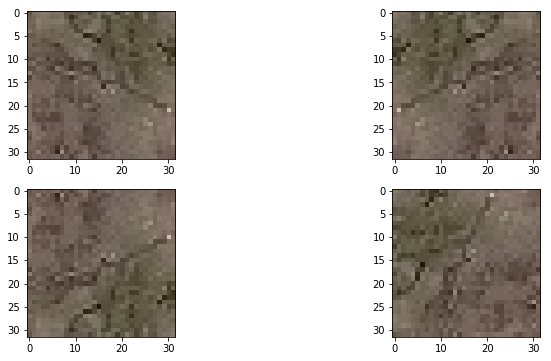

[1]


In [27]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
i = np.random.randint(len(X))
ax[0,0].imshow(X[i])
ax[1,0].imshow(X_vflip[i])
ax[0,1].imshow(X_hflip[i])
ax[1,1].imshow(X_flip[i])
plt.show()
print(y[i])

In [28]:
from sklearn.model_selection import train_test_split

In [36]:
X_all = np.concatenate((X,X_vflip,X_hflip,X_rot))
y_all = np.concatenate((y,y,y,y))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42)

In [38]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

Using TensorFlow backend.


In [39]:
input_layer = Input(shape=(32,32,3))
x = Convolution2D(16, kernel_size=3,activation='relu')(input_layer)
x = MaxPooling2D()(x)
x = Convolution2D(32, kernel_size=3,activation='relu')(x)
x = Convolution2D(64, kernel_size=3,activation='relu')(x)
x = MaxPooling2D()(x)
x = Dense(256,activation='relu')(Flatten()(x))
x = Dropout(rate=0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [40]:
model.fit(X_train,y_train,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
46900/46900 [==============================] - 50s 1ms/step - loss: 0.1421 - acc: 0.9461
Epoch 2/10
46900/46900 [==============================] - 48s 1ms/step - loss: 0.0694 - acc: 0.9748
Epoch 3/10
46900/46900 [==============================] - 47s 994us/step - loss: 0.0512 - acc: 0.9819
Epoch 4/10
46900/46900 [==============================] - 44s 941us/step - loss: 0.0494 - acc: 0.9821
Epoch 5/10
46900/46900 [==============================] - 45s 949us/step - loss: 0.0329 - acc: 0.9882
Epoch 6/10
46900/46900 [==============================] - 44s 948us/step - loss: 0.0265 - acc: 0.9899
Epoch 7/10
46900/46900 [==============================] - 44s 928us/step - loss: 0.0224 - acc: 0.9922
Epoch 8/10
46900/46900 [==============================] - 44s 934us/step - loss: 0.0199 - acc: 0.9929
Epoch 9/10
46900/46900 [==============================] - 44s 943us/step - loss: 0.0178 - acc: 0.9936
Epoch 10/10
46900/46900 [=============

In [41]:
model.evaluate(X_test,y_test)

23100/23100 [==============================] - 8s 356us/step


[0.023112407257412287, 0.9926839826839827]

In [53]:
tpath = 'test'
submit = pd.read_csv('sample_submission.csv')
t_X = np.zeros(shape=(len(submit),32,32,3))

for i,v in submit.iterrows():
    t_X[i] = (mpimg.imread(f'{tpath}/{v[0]}'))/255

In [54]:
t_y = model.predict(t_X)

In [58]:
submit['has_cactus'] = t_y
submit.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.999982
1,0017242f54ececa4512b4d7937d1e21e.jpg,1.000000
2,001ee6d8564003107853118ab87df407.jpg,0.002661
3,002e175c3c1e060769475f52182583d0.jpg,0.002253
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.980105


In [59]:
submit.to_csv('170419.csv')